In [53]:
import pandas as pd

In [54]:
#importing data for each game streamed on twitch
df1 = pd.read_csv('Twitch_game_data.csv',encoding='cp1252')

In [55]:
df1.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [56]:
#importing regex for data cleaning in later manipulation
import re
def remove_parens_and_contents(s):
    if isinstance(s, str):
        return re.sub(r'\(.*\)', '', s)
    return s

df1 = df1.applymap(remove_parens_and_contents)

In [57]:
#applying dtype change and for hours column
hours = df1.copy()
hours = hours['Hours_Streamed'].astype('string')
df1 = pd.concat([df1,hours],axis=1)



In [58]:
#removing original column
df1 = df1.loc[:,~df1.T.duplicated(keep='last')]


In [59]:
#checking change
df1.head()

,Rank,Game,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Hours_Streamed
0,1,League of Legends,1,2016,94377226,530270,2903,129172,127021,1833,69.29,1362044 hours
1,2,Counter-Strike: Global Offensive,1,2016,47832863,372654,2197,120849,64378,1117,57.62,830105 hours
2,3,Dota 2,1,2016,45185893,315083,1100,44074,60815,583,104.26,433397 hours
3,4,Hearthstone,1,2016,39936159,131357,517,36170,53749,317,169.29,235903 hours
4,5,Call of Duty: Black Ops III,1,2016,16153057,71639,3620,214054,21740,1549,14.03,1151578 hours


In [60]:
#finally remove string
df1['Hours_Streamed'] = df1["Hours_Streamed"].str.replace(" hours","")

In [61]:
#checking to see which columns need to be changed to integer
df1.dtypes

Rank                 int64
Game                object
Month                int64
Year                 int64
Hours_watched       object
Peak_viewers        object
Peak_channels       object
Streamers           object
Avg_viewers         object
Avg_channels        object
Avg_viewer_ratio    object
Hours_Streamed      string
dtype: object

In [62]:
#changing objects to integers
convert_dict = {'Hours_watched': int,
                'Hours_Streamed': int,
                'Peak_viewers': int,
                'Peak_channels': int,
                'Streamers': int,
                'Avg_viewers': int,
                'Avg_channels': int,
                'Avg_viewer_ratio': float
                }
df1 = df1.astype(convert_dict)

In [63]:
#various stats among column values
df1.describe()

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Hours_Streamed
count,16800.000000,16800.000000,16800.00000,1.680000e+04,1.680000e+04,16800.000000,1.680000e+04,16800.000000,16800.000000,16800.000000,1.680000e+04
mean,100.500000,6.500000,2019.00000,5.313372e+06,6.015563e+04,633.085298,2.023011e+04,7284.575655,234.112738,77.731139,1.711071e+05
std,57.736024,3.452155,2.00006,1.822122e+07,1.451533e+05,2690.342057,6.165152e+04,24988.287212,757.564263,344.316222,5.526469e+05
min,1.000000,1.000000,2016.00000,8.981100e+04,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.670000,1.900000e+01
25%,50.750000,3.750000,2017.00000,4.206000e+05,9.090000e+03,57.000000,1.680750e+03,576.000000,18.000000,16.297500,1.381350e+04
50%,100.500000,6.500000,2019.00000,9.362415e+05,2.200150e+04,137.000000,4.706500e+03,1284.000000,49.000000,29.335000,3.570400e+04
75%,150.250000,9.250000,2021.00000,2.644780e+06,5.072625e+04,352.000000,1.234650e+04,3619.250000,134.000000,57.292500,9.829425e+04
max,200.000000,12.000000,2022.00000,3.445520e+08,3.366021e+06,129860.000000,1.013324e+06,479209.000000,13789.000000,13601.870000,1.024570e+07


In [64]:
#checking for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16800 non-null  int64  
 1   Game              16799 non-null  object 
 2   Month             16800 non-null  int64  
 3   Year              16800 non-null  int64  
 4   Hours_watched     16800 non-null  int64  
 5   Peak_viewers      16800 non-null  int64  
 6   Peak_channels     16800 non-null  int64  
 7   Streamers         16800 non-null  int64  
 8   Avg_viewers       16800 non-null  int64  
 9   Avg_channels      16800 non-null  int64  
 10  Avg_viewer_ratio  16800 non-null  float64
 11  Hours_Streamed    16800 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 1.5+ MB


In [65]:
#importing libraries for value plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#cleaning column names for easier use
df1.columns = map(str.lower, df1.columns)
#copying dataframe to use orignal in heatmap
twitch = df1.copy()

<AxesSubplot:>

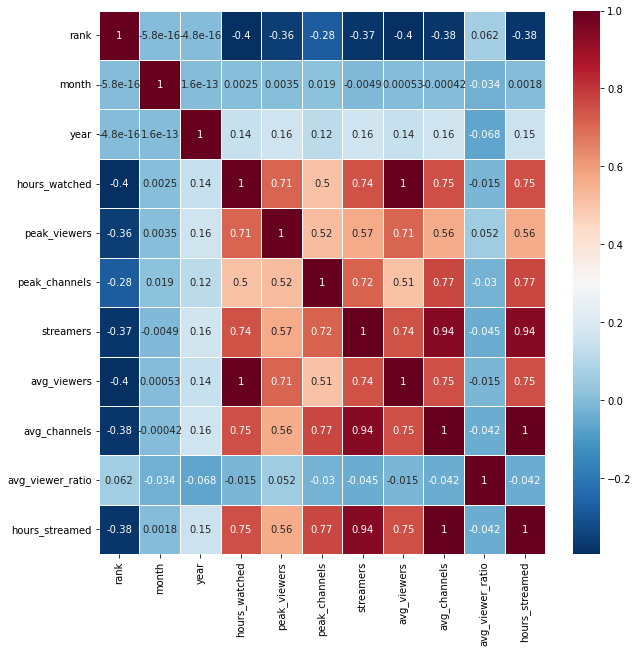

In [67]:
#creating correlation matrix and applying to heat map
df1.drop('game', inplace=True, axis=1)
corr = df1.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot=True, linewidths=0.5, ax=ax, cmap='RdBu_r')


In [68]:
#checking year range of stats
df1.year.value_counts()

2016    2400
2017    2400
2018    2400
2019    2400
2020    2400
2021    2400
2022    2400
Name: year, dtype: int64

In [69]:
#checking game counts invidually 
twitch.game.value_counts()

Retro                   85
Dungeons & Dragons      85
League of Legends       84
Super Mario 64          84
DayZ                    84
                        ..
Fire Emblem Heroes       1
Super Robot Taisen V     1
Halo Wars 2              1
Shenmue III              1
Crimson Snow             1
Name: game, Length: 1989, dtype: int64

In [70]:
#overview of copied data frame
twitch.head()

,rank,game,month,year,hours_watched,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio,hours_streamed
0,1,League of Legends,1,2016,94377226,530270,2903,129172,127021,1833,69.29,1362044
1,2,Counter-Strike: Global Offensive,1,2016,47832863,372654,2197,120849,64378,1117,57.62,830105
2,3,Dota 2,1,2016,45185893,315083,1100,44074,60815,583,104.26,433397
3,4,Hearthstone,1,2016,39936159,131357,517,36170,53749,317,169.29,235903
4,5,Call of Duty: Black Ops III,1,2016,16153057,71639,3620,214054,21740,1549,14.03,1151578


In [71]:
#creating arbitrary day column to create and convert datetime column
twitch['day'] = 1
twitch['date'] = pd.to_datetime(twitch[['year', 'month', 'day']])
twitch.drop(columns = ['year', 'month', 'day'], inplace=True)
twitch

,rank,game,hours_watched,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio,hours_streamed,date
0,1,League of Legends,94377226,530270,2903,129172,127021,1833,69.29,1362044,2016-01-01
1,2,Counter-Strike: Global Offensive,47832863,372654,2197,120849,64378,1117,57.62,830105,2016-01-01
2,3,Dota 2,45185893,315083,1100,44074,60815,583,104.26,433397,2016-01-01
3,4,Hearthstone,39936159,131357,517,36170,53749,317,169.29,235903,2016-01-01
4,5,Call of Duty: Black Ops III,16153057,71639,3620,214054,21740,1549,14.03,1151578,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...
16795,196,SCUM,608613,26987,151,3591,819,63,12.82,47458,2022-12-01
16796,197,Dungeon Fighter Online,606520,5243,70,742,816,23,34.91,17372,2022-12-01
16797,198,Detroit: Become Human,600990,23681,92,5198,808,28,28.09,21395,2022-12-01
16798,199,Super People,597551,23584,124,3432,804,39,20.52,29116,2022-12-01


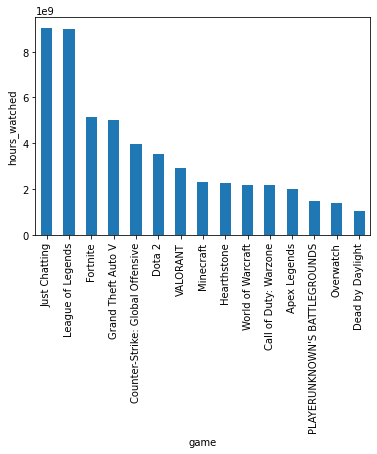

In [72]:
#ranking games by watch time
watch_time = twitch.groupby('game')['hours_watched'].sum().sort_values(ascending=False)
top15_watch_time = watch_time[:15]
top_3 = watch_time[:3]
top15_watch_time.plot(kind='bar')
plt.ylabel('hours_watched')
plt.show()

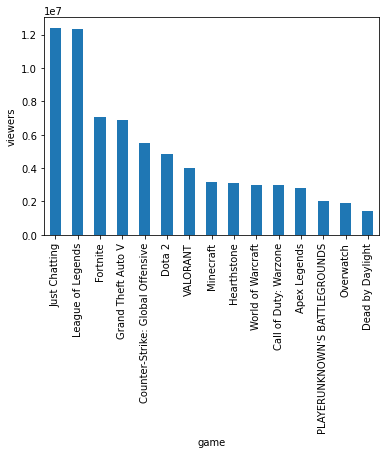

In [73]:
#ranking games by viewer average
viewers = twitch.groupby('game')['avg_viewers'].sum().sort_values(ascending=False)
top15_viewers = viewers[:15]
top15_viewers.plot(kind='bar')
plt.ylabel('viewers')
plt.show()

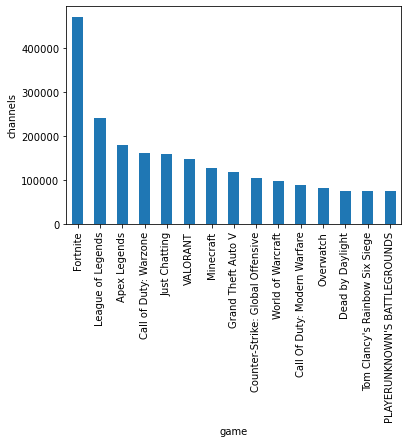

In [74]:
#ranking gmaes by total number of channels
channels = twitch.groupby('game')['avg_channels'].sum().sort_values(ascending=False)
top15_channels = channels[:15]
top15_channels.plot(kind='bar')
plt.ylabel('channels')
plt.show()

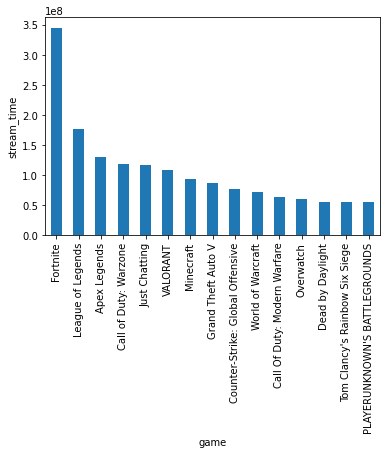

In [75]:
#ranking games across stream time
stream_time = twitch.groupby('game')['hours_streamed'].sum().sort_values(ascending=False)
top15_stream_time = stream_time[:15]
top15_stream_time.plot(kind='bar')
plt.ylabel('stream_time')
plt.show()

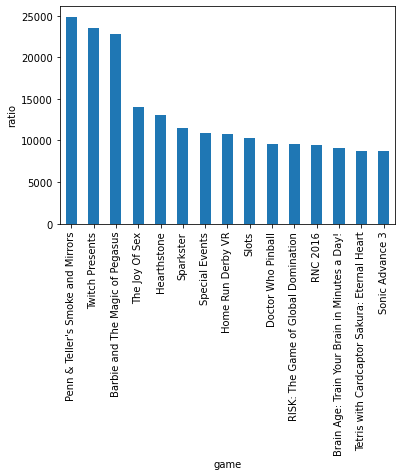

In [76]:
#ranking games by channel to viewer ratio
# outlier data for special events streamed thorugh twitch
view_ratio = twitch.groupby('game')['avg_viewer_ratio'].sum().sort_values(ascending=False)
top15_viewer_ratio = view_ratio[:15]
top15_viewer_ratio.plot(kind='bar')
plt.ylabel('ratio')
plt.show()

In [77]:
#creating new daaframe for only top game entries
top_games = twitch.copy()
game_list = ['Fortnite', 'League of Legends', 'Just Chatting']
top_games = top_games[top_games['game'].isin(game_list)]
#creating seperate data frames for each top game for plotting
lol = ['League of Legends']
lol = top_games[top_games['game'].isin(lol)]
chat = ['Just Chatting']
chat = top_games[top_games['game'].isin(chat)]
fort = ['Fortnite']
fort = top_games[top_games['game'].isin(fort)]
top_games.head()

,rank,game,hours_watched,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio,hours_streamed,date
0,1,League of Legends,94377226,530270,2903,129172,127021,1833,69.29,1362044,2016-01-01
200,1,League of Legends,93154772,475784,2712,117996,134035,1822,73.54,1266715,2016-02-01
400,1,League of Legends,94514511,599114,2585,117734,127206,1701,74.77,1264029,2016-03-01
600,1,League of Legends,88389049,553165,2945,113251,122933,1692,72.61,1217250,2016-04-01
800,1,League of Legends,80679320,433005,2635,118593,108585,1609,67.45,1196096,2016-05-01


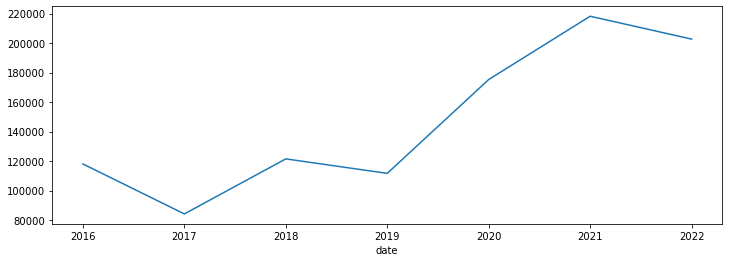

In [78]:
#viewer average by years
fig, axs = plt.subplots(figsize=(12, 4))
top_games.groupby(top_games["date"].dt.year)["avg_viewers"].mean().plot(rot=0, ax=axs)
plt.show()

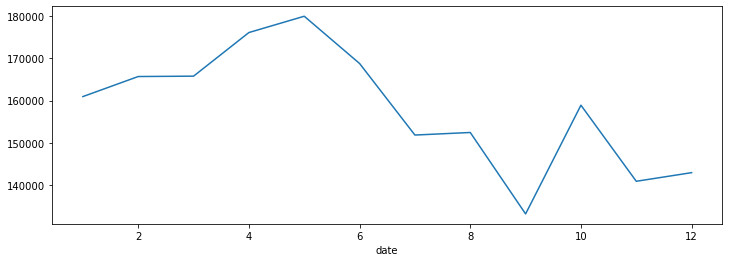

In [79]:
#month to month viewer average over a year
fig, axs = plt.subplots(figsize=(12, 4))
top_games.groupby(top_games["date"].dt.month)["avg_viewers"].mean().plot(rot=0, ax=axs)
plt.show()

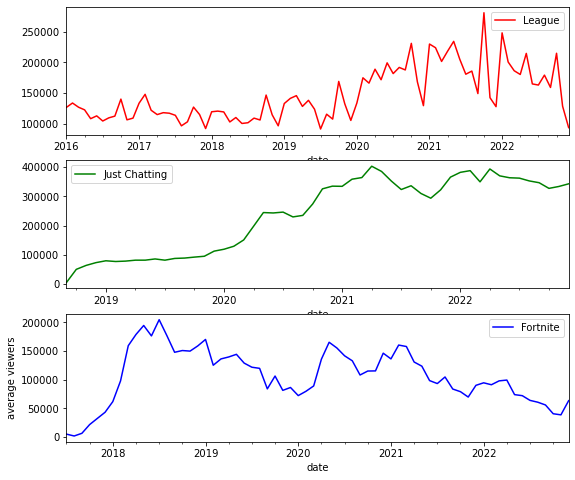

In [80]:
#subplots for popularity of each gmae over time
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(9,8))
lol.plot(x='date', y='avg_viewers', color='red', label='League', ax=axes[0])
chat.plot(x='date', y='avg_viewers', color='green', label='Just Chatting', ax=axes[1])
fort.plot(x='date', y='avg_viewers', color='blue', label='Fortnite', ax=axes[2])
plt.ylabel('average viewers')
plt.show()

In [81]:
#importing globaly twitch data and checking data structure
df2= pd.read_csv('Twitch_global_data.csv')
df2.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85


In [82]:
#lowercase columns for simplicity
df2.columns = map(str.lower, df2.columns)

In [83]:
#adding arbitrary day column to add and convert datetime column
df2['day'] = 1
df2['date'] = pd.to_datetime(df2[['year', 'month', 'day']])
df2.head()

,year,month,hours_watched,avg_viewers,peak_viewers,streams,avg_channels,games_streamed,viewer_ratio,day,date
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08,1,2016-01-01
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98,1,2016-02-01
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92,1,2016-03-01
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80,1,2016-04-01
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85,1,2016-05-01


In [84]:
#checking data types 
df2.dtypes

year                       int64
month                      int64
hours_watched              int64
avg_viewers                int64
peak_viewers               int64
streams                    int64
avg_channels               int64
games_streamed             int64
viewer_ratio             float64
day                        int64
date              datetime64[ns]
dtype: object

<AxesSubplot:>

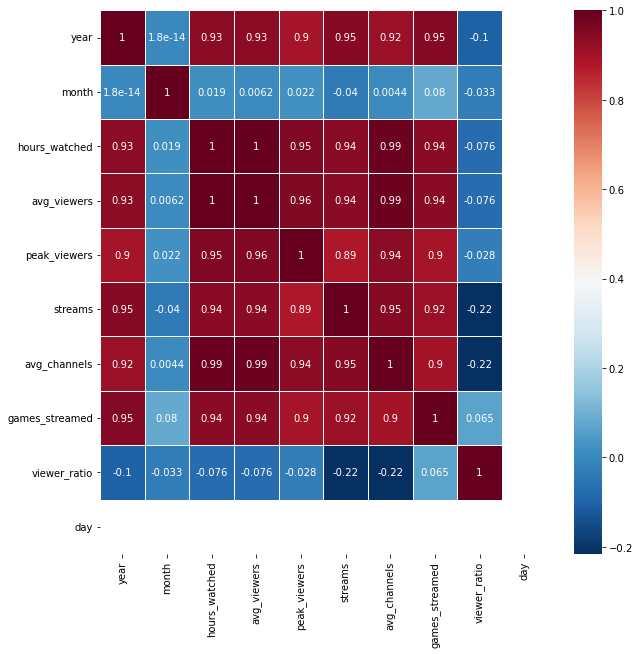

In [85]:
#correlation matrix to apply heatmap to data
corr = df2.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot=True, linewidths=0.5, ax=ax, cmap='RdBu_r')

In [86]:
#importing libraries for month and year 
import seaborn as sns
from calendar import month_name as mn

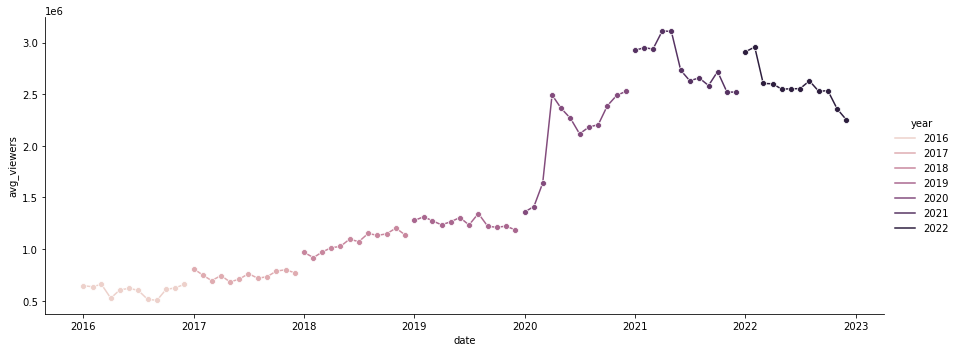

In [87]:

# month list
months = mn[1:]

# convert the column to categorical and ordered
df2.month = pd.Categorical(df2.month, categories=months, ordered=True)

# plot the data
p = sns.relplot(kind='line', data=df2, x='date', y='avg_viewers', aspect=2.5, hue='year', marker='o', label='month')

In [88]:
#finding the most watched during game during epstein scandal
aug_2019 = pd.Timestamp('2019-08-01')

# Extract the maximum value for the specified date time
max_index = twitch.loc[twitch['date'] == aug_2019, 'peak_viewers'].idxmax()

max_name = twitch.at[max_index, 'game']
max_value = twitch.at[max_index, 'peak_viewers']

print(f'most watched game August 2019 (epstein)')
print(f'game:', max_name)
print(f'peak viewers:', max_value)

most watched game August 2019 (epstein)
game: World of Warcraft
peak viewers: 1103295


In [89]:
#finding the most watched during game during covid lockdown

# Extract the maximum value for the specified date time
max_index = twitch.loc[twitch['date'] == apr_2020, 'peak_viewers'].idxmax()

max_name = twitch.at[max_index, 'game']
max_value = twitch.at[max_index, 'peak_viewers']

print(f'most watched game April 2020 (Covid Restrictions)')
print(f'game:', max_name)
print(f'peak viewers:', max_value)

most watched game April 2020 (Covid Restrictions)
game: VALORANT
peak viewers: 1728977


In [90]:
#finding the most watched during game during Geroge Floyd Murder
jun_2020 = pd.Timestamp('2020-06-01')

# Extract the maximum value for the specified date time
max_index = twitch.loc[twitch['date'] == jun_2020, 'peak_viewers'].idxmax()

max_name = twitch.at[max_index, 'game']
max_value = twitch.at[max_index, 'peak_viewers']

print(f'most watched game June 2020 (George Floyd)')
print(f'game:', max_name)
print(f'peak viewers:', max_value)

most watched game June 2020 (George Floyd)
game: Special Events
peak viewers: 3123208


In [91]:
#finding the most watched during game during congressional insurrection voting
may_2020 = pd.Timestamp('2020-05-01')

# Extract the maximum value for the specified date time
max_index = twitch.loc[twitch['date'] == may_2020, 'peak_viewers'].idxmax()

max_name = twitch.at[max_index, 'game']
max_value = twitch.at[max_index, 'peak_viewers']

print(f'most watched game May 2020 (Insurrection Vote)')
print(f'game:', max_name)
print(f'peak viewers:', max_value)

most watched game May 2020 (Insurrection Vote)
game: Just Chatting
peak viewers: 839576


In [92]:
#finding the most watched during game during Burdt Pipipeline in Claifornia
oct_2021 = pd.Timestamp('2021-10-01')

# Extract the maximum value for the specified date time
max_index = twitch.loc[twitch['date'] == oct_2021, 'peak_viewers'].idxmax()

max_name = twitch.at[max_index, 'game']
max_value = twitch.at[max_index, 'peak_viewers']

print(f'most watched game October 2021 (California Pipeline Burst)')
print(f'game:', max_name)
print(f'peak viewers:', max_value)

most watched game October 2021 (California Pipeline Burst)
game: League of Legends
peak viewers: 2364918


In [93]:
#finding the most watched during game during Russan Invasion of Ukraine
feb_2022 = pd.Timestamp('2022-02-01')

# Extract the maximum value for the specified date time
max_index = twitch.loc[twitch['date'] == feb_2022, 'peak_viewers'].idxmax()

max_name = twitch.at[max_index, 'game']
max_value = twitch.at[max_index, 'peak_viewers']

print(f'most watched game August 2019 (Russian Invasion of Ukraine)')
print(f'game:', max_name)
print(f'peak viewers:', max_value)

most watched game August 2019 (Russian Invasion of Ukraine)
game: Lost Ark
peak viewers: 1273854


In [94]:
#exporting newly created and manipulaed data for tableau vizzing
top_games.to_csv('top_3.csv')
df2.to_csv('global_twitch.csv')
twitch.to_csv('twitch.csv')

In [95]:
#creating new data frame containing, dates of spikes, most popular game, and glbal event
#used in tableau vizing
data = {'date': ['2019-08-01', '2020-04-01', '2020-05-01', '2020-06-01', '2021-10-01', '2022-02-01'],
        'event': ['Epstein Murder', 'Covid Restricitons', 'Insurrection Voting', 'George Floyd Murdered', 'California Pipeline Burst', 'Russia Invade Ukraine'],
       'game': ['World of Warcraft', 'Valorant', 'Just Chatting', 'Just Chatting', 'League Of Legends', 'Lost Ark']}
events = pd.DataFrame(data)
events.to_csv('event_timeline.csv')

## ***Most watched Games:*** ##

- League Of Legends
- Just Chatting
- Fortnite
### ***Peak Times & Games/Events:*** ###


- August 2019 (World Of Warcraft)(Epstein Murder)
- April 2020 (Valorant)(Covid Restrictions)
- May 2020 (Just Chatting)(Insurrection Voting)
- June 2020 (Special Events)(George Floyd Murder)
- Oct 2021 (League of Legends)(California Pipeline Burst)
- February 2022 (Lost Ark)(Russia Invades Ukraine)

# Major Events Hypothesis: #
- *Over the past 3 years, streaming has become a major source of entertainment and source of news for a large population*
    - recent global events have had high influence in an uptick of internet traffic in streaming
    - correlation between popular games and global events may exist
    - A rise in global communication has contributed to a rise in streaming numbers via Covid restrictions and the need for entertainment